In [51]:
import pandas as pd
import numpy as np
import logging
from scipy import stats
from io import StringIO
import logging

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.modelo_360.nodes as model_360
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

In [5]:
%load_ext kedro.ipython

[03/10/25 21:35:29] INFO     Resolved project path as:                                              ]8;id=208680;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=514939;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/10/25 21:35:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=108730;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=385131;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=47231;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=250397;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=485986;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=9563;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=205124;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=887512;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=675241;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=248339;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=692355;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=960495;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=417607;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=783289;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### Construccion de metricas historicas:

In [7]:
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [10]:
ruta1 = 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/VIV/09-backtesting/'

archivos_360 = {
    '202410':'',
    '202411':'insumo_modelo_360_sin_eda_t3_202411.pickle'
    #'202412':'insumo_modelo_360_sin_eda_t3_202412.pickle'
}

archivos_backtesting = {
    '202410':'save_backtesting_sin_eda_t3_202410.pickle',
    '202411':'save_backtesting_sin_eda_t3_202411.pickle'
    #'202412':'save_backtesting_sin_eda_t3_202412.pickle'
}


In [11]:
ruta = 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/TC/09-backtesting/'

archivos_360 = {
    '202401':'', # viv
    '202407':'',# viv
    '202408':'insumo_modelo_360_sin_eda_t3_202411.pickle', # viv
    '202409':'insumo_modelo_360_sin_eda_t3_202412.pickle', # viv
    '202410':'insumo_modelo_360_sin_eda_t3_202412.pickle', 
    '202411':'insumo_modelo_360_new_t3_v3_1_202411.pickle'
    #'202412':'insumo_modelo_360_new_t3_v3_1_202412.pickle'
}

archivos_backtesting = {
    '202401':'save_backtesting_sin_eda_t3_202410.pickle', # viv
    '202407':'save_backtesting_sin_eda_t3_202410.pickle', # viv
    '202408':'save_backtesting_sin_eda_t3_202411.pickle', # viv
    '202409':'save_backtesting_sin_eda_t3_202412.pickle',# viv
    '202410':'save_backtesting_new_t3_v2_0_202410.pickle', # tc viejo
    '202411':'save_backtesting_new_t3_v3_1_202411.pickle' # tc produccion
    #'202412':'save_backtesting_new_t3_v3_1_202412.pickle' # tc produccion
}

In [12]:
cortes_totales = list(archivos_backtesting.keys())+list(archivos_360.keys())
cortes_totales = sorted(list(set(cortes_totales)))
insumos_ordenamiento = {}
for corte in cortes_totales:
    try:
        archivo = archivos_360[corte]
        try:
            ruta_corte = f'{ruta}{archivo}'
            insumos_360 = pd.read_pickle(ruta_corte)
        except:
            ruta_corte = f'{ruta1}{archivo}'
            insumos_360 = pd.read_pickle(ruta_corte)
        logger.info(f'Ok insumo de ordenamiento para el corte {corte}')
    except:
        logger.info(f'No encontramos el insumo de ordenamiento y por esto cargaremos el backtesting de {corte}.')
        logger.info(f'Calculando los insumos de ordenamiento...')
        archivo = archivos_backtesting[corte]
        try:
            ruta_corte = f'{ruta}{archivo}'
            backtesting_corte = pd.read_pickle(ruta_corte)
        except:
            ruta_corte = f'{ruta1}{archivo}'
            backtesting_corte = pd.read_pickle(ruta_corte)
        insumos_360 = backtesting.modelo_360_full(backtesting_corte, params)
    finally:
        insumos_ordenamiento[corte] = insumos_360
        logger.info('------------------')

[03/10/25 21:36:13] INFO     No encontramos el insumo de ordenamiento y por esto cargaremos el     ]8;id=977207;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=391251;file:///tmp/ipykernel_3438/3716938194.py#15\15]8;;\
                             backtesting de 202401.                                                                

                    INFO     Calculando los insumos de ordenamiento...                             ]8;id=997437;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=784120;file:///tmp/ipykernel_3438/3716938194.py#16\16]8;;\

[03/10/25 21:42:11] INFO     Iniciando insumo modelo 360 t-1                                           ]8;id=554419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=592122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-1                                         ]8;id=555521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=75279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-2                                           ]8;id=731858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=534370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-2                                         ]8;id=469766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=859195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-3                                           ]8;id=228267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=489336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-3                                         ]8;id=338583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=183927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-Combined                                    ]8;id=164209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=404749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-Combined                                  ]8;id=289888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=862178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     ------------------                                                    ]8;id=722969;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=649332;file:///tmp/ipykernel_3438/3716938194.py#27\27]8;;\

                    INFO     No encontramos el insumo de ordenamiento y por esto cargaremos el     ]8;id=445629;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=237218;file:///tmp/ipykernel_3438/3716938194.py#15\15]8;;\
                             backtesting de 202407.                                                                

                    INFO     Calculando los insumos de ordenamiento...                             ]8;id=304658;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=299665;file:///tmp/ipykernel_3438/3716938194.py#16\16]8;;\

[03/10/25 21:48:17] INFO     Iniciando insumo modelo 360 t-1                                           ]8;id=300310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=965649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-1                                         ]8;id=576652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=939122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-2                                           ]8;id=294171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=82935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-2                                         ]8;id=474652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=512301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-3                                           ]8;id=749378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=99108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-3                                         ]8;id=479945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=770483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     Iniciando insumo modelo 360 t-Combined                                    ]8;id=532295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=439213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#527\527]8;;\

                    INFO     Finalizando insumo modelo 360 t-Combined                                  ]8;id=857425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=896173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#534\534]8;;\

                    INFO     ------------------                                                    ]8;id=890803;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=41628;file:///tmp/ipykernel_3438/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202408                        ]8;id=536751;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=479705;file:///tmp/ipykernel_3438/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=798689;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=736094;file:///tmp/ipykernel_3438/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202409                        ]8;id=821667;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=729373;file:///tmp/ipykernel_3438/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=59446;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=519486;file:///tmp/ipykernel_3438/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202410                        ]8;id=453420;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=603132;file:///tmp/ipykernel_3438/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=493030;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=373669;file:///tmp/ipykernel_3438/3716938194.py#27\27]8;;\

                    INFO     Ok insumo de ordenamiento para el corte 202411                        ]8;id=351549;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=140662;file:///tmp/ipykernel_3438/3716938194.py#13\13]8;;\

                    INFO     ------------------                                                    ]8;id=741959;file:///tmp/ipykernel_3438/3716938194.py\3716938194.py]8;;\:]8;id=418201;file:///tmp/ipykernel_3438/3716938194.py#27\27]8;;\

In [13]:
insumos_ordenamiento.keys()

dict_keys(['202401', '202407', '202408', '202409', '202410', '202411'])

In [14]:
insumos_ordenados = {}
for corte in cortes_totales:
    print(corte)
    for t in insumos_ordenamiento[corte].keys():
        bd = insumos_ordenamiento[corte][t]['Discriminacion']
        bd['Corte'] = int(corte)
        if t not in insumos_ordenados:
            insumos_ordenados[t] = {}
            bd_full = bd.copy()
        else:
            bd_full = insumos_ordenados[t]
            bd_full = pd.concat([bd_full, bd] , axis = 0)
        insumos_ordenados[t] =  bd_full

202401
202407
202408
202409
202410
202411


In [15]:
insumos_ordenados.keys()

dict_keys([1, 2, 3, 'Combined'])

In [56]:
y_name = 'N'
x_name = 'Corte'
z_name = '% Aciertos'
rezago = 2
corte_ventana_movil = '202410' # el pernultimo mes
corte_actual = '202411'
corte_produccion = '202401'
nivel_aceptabilidad = 3 # en desviaciones estandar
nodos = [40.000,80.000,308.346,616.175,924.263]
periodos_ventana_corta = 3
periodos_ventana_larga = 6

In [57]:
cortes_totales2 = cortes_totales.copy()
sub_bd = insumos_ordenados[rezago]
if (x_name == 'N') | (y_name == 'N'):
    adj_value = sub_bd['xN'].iloc[0]
else:
    adj_value = 1

sub_bd = sub_bd.sort_values(by='N')
sub_bd.index = range(sub_bd.shape[0])
x = sub_bd[x_name].drop_duplicates()
y = sub_bd[y_name].drop_duplicates()
if x_name == 'Corte':
    ciclo1 = x.copy()
    ciclo2 = y.copy()
elif y_name == 'Corte':
    ciclo1 = y.copy()
    ciclo2 = x.copy()

z = pd.DataFrame(index = x, columns = y)
if x_name in ['COLUMN','N']:
    for tt in y:
        z[f'{tt}_N'] = None
else:
    for t in x:
        z.loc[f'{t}_N'] = None

errores = []
for t in ciclo1:
    sub_bd_filt = sub_bd[sub_bd[x_name] == t]
    for tt in ciclo2:
        sub_bd_filt3 = sub_bd_filt[sub_bd_filt[y_name] == tt]
        sub_bd_filt2 = sub_bd_filt3[z_name]
        if sub_bd_filt2.shape[0] == 1:
            z.loc[t,tt] = sub_bd_filt2.iloc[0]
            if x_name in ['COLUMN','N']:
                z.loc[t,f'{tt}_N'] = sub_bd_filt3[['N','xN']].prod(axis  =1).iloc[0]
            else:
                z.loc[f'{t}_N',tt] = sub_bd_filt3[['N','xN']].prod(axis  =1).iloc[0]
        else:
            #logger.info(f'Se evidencia problemas en el corte y ordenamiento {t},{tt}:')
            #logger.info(sub_bd_filt2)
            if x_name in ['COLUMN','N']:
                z.loc[t,f'{tt}_N'] = t*adj_value
                if tt not in errores:
                    errores.append(tt)
            else:
                z.loc[f'{t}_N',tt] = tt*adj_value
                if t not in errores:
                    errores.append(t)
errores = sorted(errores)
for adj in errores:
    logger.info(f'Interpolando el corte {adj} en el rezago de informacion {rezago}')
    if x_name in ['COLUMN','N']:
        metrica_nulos = z[adj].astype(float)
        n_obs = z[f'{adj}_N'].astype(float)
    else:
        metrica_nulos = z.loc[adj].astype(float)
        n_obs = z.loc[f'{adj}_N'].astype(float)
    metrica_nulos = np.log(metrica_nulos)
    metrica_nulos = metrica_nulos.replace(np.inf,0)
    metrica_nulos = metrica_nulos.replace(-np.inf,0)
    # Identificar los índices que no son NaN
    valid_indices = metrica_nulos.dropna().index
    
    # Interpolar usando el método de interpolación lineal
    f_interp = spi.interp1d(n_obs.loc[valid_indices],metrica_nulos.loc[valid_indices], kind='quadratic', fill_value="extrapolate")
    
    # Crear nuevos valores interpolados
    y_interp = f_interp(n_obs)
    for t,pos in enumerate(metrica_nulos.index):
        if metrica_nulos.isnull().loc[pos] == True:
            metrica_nulos.loc[pos] = y_interp[t]
    metrica_nulos = np.exp(metrica_nulos)
    if x_name in ['COLUMN','N']:
        z[adj] = metrica_nulos
    else:
        z.loc[adj] = metrica_nulos

for adj in cortes_totales:
    if x_name in ['COLUMN','N']:
        z = z.drop([f'{adj}_N'], axis = 1)
    else:
        z = z.drop([f'{adj}_N'], axis = 0)

z = z.astype(float)
z1 = z.T
if x_name in ['COLUMN','N']:
    x = x.astype(float)
    y = y.astype(int)
else:
    x = x.astype(int)
    y = y.astype(float)
x = x.sort_values()
try:
    z1 = z1[x.values]
except:
    z1 = z1[cortes_totales]
x = x[~x.isin([corte_produccion, int(corte_produccion)])]
if corte_produccion in cortes_totales2:
    cortes_totales2.remove(corte_produccion)
x1, y1 = np.meshgrid(x, y)

[03/11/25 14:00:06] INFO     Interpolando el corte 202401 en el rezago de informacion 2             ]8;id=899249;file:///tmp/ipykernel_3438/960928700.py\960928700.py]8;;\:]8;id=149787;file:///tmp/ipykernel_3438/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202407 en el rezago de informacion 2             ]8;id=827944;file:///tmp/ipykernel_3438/960928700.py\960928700.py]8;;\:]8;id=780561;file:///tmp/ipykernel_3438/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202408 en el rezago de informacion 2             ]8;id=423620;file:///tmp/ipykernel_3438/960928700.py\960928700.py]8;;\:]8;id=155203;file:///tmp/ipykernel_3438/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202409 en el rezago de informacion 2             ]8;id=260583;file:///tmp/ipykernel_3438/960928700.py\960928700.py]8;;\:]8;id=352062;file:///tmp/ipykernel_3438/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202410 en el rezago de informacion 2             ]8;id=66963;file:///tmp/ipykernel_3438/960928700.py\960928700.py]8;;\:]8;id=482672;file:///tmp/ipykernel_3438/960928700.py#52\52]8;;\

                    INFO     Interpolando el corte 202411 en el rezago de informacion 2             ]8;id=545036;file:///tmp/ipykernel_3438/960928700.py\960928700.py]8;;\:]8;id=962609;file:///tmp/ipykernel_3438/960928700.py#52\52]8;;\

In [58]:
print(x1.shape)
print(y1.shape)
print(z1.shape)

(32, 5)
(32, 5)
(32, 6)


In [59]:
z1

Corte,202401,202407,202408,202409,202410,202411
N,,,,,,
10.000,6.032000,6.032000,6.032000,6.940200,6.940200,1.121000
25.000,14.033600,14.033600,14.033600,12.730100,12.730100,2.561100
40.000,19.819500,19.819500,19.819500,18.519900,18.519900,3.861100
60.000,28.559700,28.559700,28.559700,23.082800,23.082800,5.418000
80.000,34.837900,34.837900,34.837900,29.026100,29.026100,6.772500
100.000,39.967200,39.967200,39.967200,32.630400,32.630400,8.080300
120.000,45.096400,45.096400,45.096400,36.388000,36.388000,9.185700
140.000,48.256100,48.256100,48.256100,40.337400,40.337400,10.439000
160.000,51.538800,51.538800,51.538800,43.136500,43.136500,11.474400


### Alertas:

In [60]:
try:
    z_actual = z1[corte_actual]
except:
    z_actual = z1[int(corte_actual)]

try:
    z_inicial = z1[corte_produccion]
except:
    z_inicial = z1[int(corte_produccion)]    

In [61]:
z2 = z1.drop([z_inicial.name], axis = 1)
z2_ventanas = z2.drop([z_actual.name], axis = 1)
if periodos_ventana_larga> np.min([periodos_ventana_larga,z2_ventanas.shape[1]]):
    periodos_ventana_larga = np.min([periodos_ventana_larga,z2_ventanas.shape[1]])
    logger.info(f'Ventana de largo plazo muy grande. Se ajustara a {periodos_ventana_larga} periodos')
ventana_larga = z2_ventanas.T.rolling(window=periodos_ventana_larga).mean().T
ventana_larga_std = z2_ventanas.T.rolling(window=periodos_ventana_larga).std().T
ventana_corta = z2_ventanas.T.rolling(window=periodos_ventana_corta).mean().T
ventana_corta_std = z2_ventanas.T.rolling(window=periodos_ventana_corta).std().T
ventana_corta

[03/11/25 14:00:10] INFO     Ventana de largo plazo muy grande. Se ajustara a 4 periodos            ]8;id=998196;file:///tmp/ipykernel_3438/2969288281.py\2969288281.py]8;;\:]8;id=487138;file:///tmp/ipykernel_3438/2969288281.py#5\5]8;;\

Corte,202407,202408,202409,202410
N,,,,
10.000,NaN,NaN,6.334733,6.637467
25.000,NaN,NaN,13.599100,13.164600
40.000,NaN,NaN,19.386300,18.953100
60.000,NaN,NaN,26.734067,24.908433
80.000,NaN,NaN,32.900633,30.963367
100.000,NaN,NaN,37.521600,35.076000
120.000,NaN,NaN,42.193600,39.290800
140.000,NaN,NaN,45.616533,42.976967
160.000,NaN,NaN,48.738033,45.937267


In [62]:
try:
    ventana_larga2 = ventana_larga[corte_ventana_movil]
except:
    ventana_larga2 = ventana_larga[int(corte_ventana_movil)]
try:
    ventana_larga_std2 = ventana_larga_std[corte_ventana_movil]
except:
    ventana_corta_std2 = ventana_larga_std[int(corte_ventana_movil)]
try:
    ventana_corta2 = ventana_corta[corte_ventana_movil]
except:
    ventana_corta2 = ventana_corta[int(corte_ventana_movil)]
try:
    ventana_corta_std2 = ventana_corta_std[corte_ventana_movil]
except:
    ventana_corta_std2 = ventana_corta_std[int(corte_ventana_movil)]

In [63]:
std_used = pd.concat([ventana_corta_std2,ventana_corta_std2,ventana_corta.std(axis = 1).to_frame().rename(columns={0:ventana_corta_std2.name})], axis = 1)
std_used = std_used.max(axis = 1)
alerta_modelo = ventana_larga2-nivel_aceptabilidad*std_used
alerta_modelo


N
10.000       4.913051
25.000      11.124122
40.000      16.918727
60.000      16.334981
80.000      21.865667
100.000     23.591090
120.000     25.658809
140.000     30.581159
160.000     32.784439
180.000     36.815566
200.000     39.492871
220.000     41.208872
308.087     48.565767
308.346     48.584647
616.175     59.208322
616.692     59.216932
924.263     62.501435
925.038     62.506349
1232.351    63.939317
1233.384    63.946425
1540.439    66.649843
1541.730    66.657562
1848.527    67.318715
1850.076    67.320977
2156.615    67.929826
2158.422    67.932759
2464.703    68.222656
2466.768    68.223869
2772.791    68.342981
2775.114    68.343429
3080.879    68.342596
3083.460    68.342083
dtype: float64

## Alerta de cambio de estructura de datos

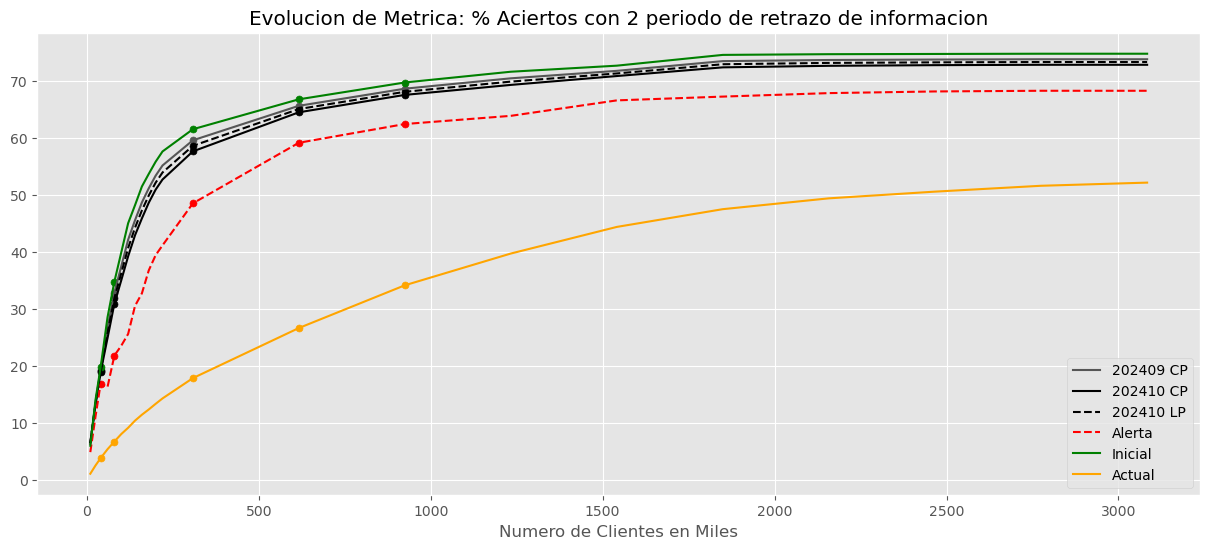

In [64]:
# Crear el gráfico
plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
# Usar un mapa de colores de tonos grises (puedes ajustar el número de colores según el número de columnas)
colors = plt.cm.Greys(np.linspace(0.2, 1, ventana_corta.shape[1]))  # Degradado de gris

# Graficar cada columna con un color diferente
for i, column in enumerate(ventana_corta.columns):
    if ventana_corta[column].dropna().shape[0] == 0:
        pass
    else:
        plt.plot(ventana_corta.index, ventana_corta[column], label=str(column)+' CP', color=colors[i])
        plt.scatter(nodos,ventana_corta.loc[nodos, column], color = colors[i], s = 25)
    if str(corte_ventana_movil) != str(column):
        pass
    else:
        plt.plot(ventana_larga.index, ventana_larga[column], label=str(column)+' LP', color=colors[i], linestyle = '--')
        plt.scatter(nodos,ventana_larga.loc[nodos, column],color = colors[i], s = 25)

plt.plot(alerta_modelo.index, alerta_modelo.values, label = 'Alerta', color='red', linestyle = '--')
plt.scatter(nodos,alerta_modelo.loc[nodos].values,color='red', s = 25)

for z_plot,label,col in [[z_inicial,'Inicial','green'],[z_actual,'Actual','orange']]:
    plt.plot(z_plot.index,z_plot.values, label = [label], color = col)
    plt.scatter(nodos,z_plot.loc[nodos],color = col, s = 25)
# Agregar leyenda
plt.legend()
# Mostrar el gráfico
plt.title(f'Evolucion de Metrica: {z_name} con {rezago} periodo de retrazo de informacion')
plt.xlabel(f'Numero de Clientes en Miles')
plt.show()

In [66]:
# cuando la ventana corta es < ventana larga
logger.info(f'Analisis en los cambios de la estructura de los datos...')
cond = ventana_corta2[(ventana_corta2 < ventana_larga2)]
logger.info(f'Validando los nodos del ordenamiento con la ventana corta de {periodos_ventana_corta} periodos que estan por debajo de la ventana larga de {periodos_ventana_larga} periodos. ')
movimiento1 = (z_actual / ventana_corta2 -1)*100
movimiento = movimiento.loc[cond.index]
logger.info(f'Ultimo Backtesting vs {periodos_ventana_corta} periodos:')
logger.info(f'% Movimiento sobre los nodos de interes')
logger.info(movimiento1.loc[movimiento1.index[movimiento1.index.isin(nodos)]].to_frame())
movimiento = movimiento[movimiento<0]
if movimiento.shape[0]>0:
    logger.info(f'Caida maxima: {np.round(movimiento.min(),3)}%. Nodo: {movimiento.idxmin(axis = 0)}')
    logger.info(f'Caida minima: {np.round(movimiento.max(),3)}%. Nodo: {movimiento.idxmax(axis = 0)}')
else:
    logger.info(f'No hubo caida del modelo a lo largo de la curva')
logger.info(f'--------')
logger.info(f'Ordenamiento del ultimo Backtesting vs el nivel de la alerta permitida')
alerta_generada = (z_actual/alerta_modelo-1)*100
alerta_generada2 = alerta_generada[alerta_generada<0]
alerta_generada2 = alerta_generada2.to_frame().rename(columns= {0:'Actual vs Alerta'})
if alerta_generada2.shape[0] == 0:
    logger.info(f'No hubo alerta generada')
else:
    logger.info(f'% Deficiencia del modelo: (Backtesting_t /Alerta -1)*100 :')
    logger.info(alerta_generada2)

[03/11/25 14:00:29] INFO     Analisis en los cambios de la estructura de los datos...               ]8;id=276626;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=17958;file:///tmp/ipykernel_3438/1548191959.py#2\2]8;;\

                    INFO     Validando los nodos del ordenamiento con la ventana corta de 3         ]8;id=807442;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=902257;file:///tmp/ipykernel_3438/1548191959.py#4\4]8;;\
                             periodos que estan por debajo de la ventana larga de 4 periodos.                      

                    INFO     Ultimo Backtesting vs 3 periodos:                                      ]8;id=339868;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=848780;file:///tmp/ipykernel_3438/1548191959.py#7\7]8;;\

                    INFO     % Movimiento sobre los nodos de interes                                ]8;id=917172;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=409422;file:///tmp/ipykernel_3438/1548191959.py#8\8]8;;\

                    INFO                      0                                                     ]8;id=526137;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=10458;file:///tmp/ipykernel_3438/1548191959.py#9\9]8;;\
                             N                                                                                     
                             40.000  -79.628135                                                                    
                             80.000  -78.127378                                                                    
                             308.346 -68.973633                                                                    
                             616.175 -58.661785                                                                    
                             924.263 -49.436729                                                                    

                    INFO     Caida maxima: -80.546%. Nodo: 25.0                                    ]8;id=232920;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=304557;file:///tmp/ipykernel_3438/1548191959.py#12\12]8;;\

                    INFO     Caida minima: -28.373%. Nodo: 3083.46                                 ]8;id=556112;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=375654;file:///tmp/ipykernel_3438/1548191959.py#13\13]8;;\

                    INFO     --------                                                              ]8;id=701898;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=1778;file:///tmp/ipykernel_3438/1548191959.py#16\16]8;;\

                    INFO     Ordenamiento del ultimo Backtesting vs el nivel de la alerta          ]8;id=369005;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=35291;file:///tmp/ipykernel_3438/1548191959.py#17\17]8;;\
                             permitida                                                                             

                    INFO     % Deficiencia del modelo: (Backtesting_t /Alerta -1)*100 :            ]8;id=154643;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=509786;file:///tmp/ipykernel_3438/1548191959.py#24\24]8;;\

[03/11/25 14:00:30] INFO               Actual vs Alerta                                            ]8;id=726436;file:///tmp/ipykernel_3438/1548191959.py\1548191959.py]8;;\:]8;id=523774;file:///tmp/ipykernel_3438/1548191959.py#25\25]8;;\
                             N                                                                                     
                             10.000          -77.183223                                                            
                             25.000          -76.977059                                                            
                             40.000          -77.178543                                                            
                             60.000          -66.831917                                                            
                             80.000          -69.026785                                                            
                             100.000         -65.748509                                                            
                             120.000         -64.200598                                                            
                             140.000         -65.864603                                                            
                             160.000         -65.000469                                                            
                             180.000         -66.316694                                                            
                             200.000         -66.096666                                                            
                             220.000         -65.203852                                                            
                             308.087         -63.153618                                                            
                             308.346         -63.148029                                                            
                             616.175         -54.925525                                                            
                             616.692         -54.910025                                                            
                             924.263         -45.299903                                                            
                             925.038         -45.277239                                                            
                             1232.351        -37.812972                                                            
                             1233.384        -37.793395                                                            
                             1540.439        -33.333757                                                            
                             1541.730        -33.316493                                                            
                             1848.527        -29.364217                                                            
                             1850.076        -29.348322                                                            
                             2156.615        -27.197958                                                            
                             2158.422        -27.188442                                                            
                             2464.703        -25.785608                                                            
                             2466.768        -25.776270                                                            
                             2772.791        -24.411197                                                            
                             2775.114        -24.402534                                                            
                             3080.879        -23.596274                                                            
                             3083.460      

### Alerta de Mantenimiento

In [67]:
def drawndown_calc(z_actual,z_inicial,column):
    drawdown_max = (z_actual/z_inicial.values-1)*100
    validate = drawdown_max[drawdown_max>=0].index.tolist()
    for i in validate:
        drawdown_max.loc[i] = 0
    drawdown_max = drawdown_max.to_frame()
    drawdown_max.columns =  [column]
    return drawdown_max

In [68]:
logger.info(f'Comparando metricas actuales vs metricas desde la fecha de producción...')
logger.info(f'Calculando la maxima caida...')
drawdown_actual_ini = drawndown_calc(z_actual,z_inicial,'Actual vs Initial')
drawdown_actual_ventana_corta = drawndown_calc(z_actual,ventana_corta2,f'Actual vs {periodos_ventana_corta} periods')
drawdown_actual_ventana_larga = drawndown_calc(z_actual,ventana_larga2,f'Actual vs {periodos_ventana_larga} periods')
drawdown = pd.concat([drawdown_actual_ini,drawdown_actual_ventana_corta,drawdown_actual_ventana_larga], axis = 1)
if any(drawdown<-15):
    logger.info('Alerta: Drawdown superior al 15%:')
    drawdown2 = drawdown[(drawdown<-15).apply(any, axis= 1)]
    logger.info(drawdown2)
logger.info(f'Drawdown en los nodos de interes:')
drawdown1 = drawdown.loc[nodos]
logger.info(drawdown1)

[03/11/25 14:00:43] INFO     Comparando metricas actuales vs metricas desde la fecha de             ]8;id=617214;file:///tmp/ipykernel_3438/1510273552.py\1510273552.py]8;;\:]8;id=701040;file:///tmp/ipykernel_3438/1510273552.py#1\1]8;;\
                             producción...                                                                         

                    INFO     Calculando la maxima caida...                                          ]8;id=630995;file:///tmp/ipykernel_3438/1510273552.py\1510273552.py]8;;\:]8;id=622255;file:///tmp/ipykernel_3438/1510273552.py#2\2]8;;\

                    INFO     Alerta: Drawdown superior al 15%:                                      ]8;id=591418;file:///tmp/ipykernel_3438/1510273552.py\1510273552.py]8;;\:]8;id=580191;file:///tmp/ipykernel_3438/1510273552.py#8\8]8;;\

                    INFO               Actual vs Initial  Actual vs 3 periods  Actual vs 4 periods ]8;id=163883;file:///tmp/ipykernel_3438/1510273552.py\1510273552.py]8;;\:]8;id=126109;file:///tmp/ipykernel_3438/1510273552.py#10\10]8;;\
                             N                                                                                     
                             10.000           -81.415782           -83.111026           -82.716887                 
                             25.000           -81.750228           -80.545554           -80.861391                 
                             40.000           -80.518681           -79.628135           -79.858318                 
                             60.000           -81.029212           -78.248331           -79.017282                 
                             80.000           -80.559965           -78.127378           -78.790868                 
                             100.000          -79.782672           -76.963451           -77.739485                 
                             120.000          -79.630968           -76.621245           -77.454089                 
                             140.000          -78.367502           -75.710245           -76.433937                 
                             160.000          -77.736385           -75.021587           -75.760520                 
                             180.000          -76.930905           -74.534075           -75.178793                 
                             200.000          -76.042613           -73.741847           -74.357496                 
                             220.000          -75.144995           -72.826213           -73.445545                 
                             308.087          -70.942492           -68.984248           -69.498143                 
                             308.346          -70.930688           -68.973633           -69.487192                 
                             616.175          -60.071330           -58.661785           -59.023420                 
                             616.692          -60.055203           -58.645768           -59.007370                 
                             924.263          -51.014467           -49.436729           -49.840615                 
                             925.038          -50.994643           -49.416132           -49.820217                 
                             1232.351         -44.530154           -42.680923           -43.154694                 
                             1233.384         -44.509915           -42.660799           -43.134536                 
                             1540.439         -38.921174           -37.352941           -37.752501                 
                             1541.730         -38.903749           -37.335532           -37.735085                 
                             1848.527         -36.288824           -34.367075           -34.858300                 
                             1850.076         -36.277113           -34.354260           -34.845771                 
                             2156.615         -33.853329           -31.996532           -32.470436                 
                             2158.422         -33.841376           -31.985192           -32.458934                 
                             2464.703         -32.315673           -30.488884           -30.954764                 
                             2466.768         -32.306353           -30.479544           -30.945428                 
                             2772.791         -30.978710           -29.139843           -29.608685                 
                             2775.114         -30.970485           -29.131490           -29.600364                 
                             3080.879         -30.235275           -28.376406           -28.850348                 
                             3083.460      

                    INFO     Drawdown en los nodos de interes:                                     ]8;id=490893;file:///tmp/ipykernel_3438/1510273552.py\1510273552.py]8;;\:]8;id=696574;file:///tmp/ipykernel_3438/1510273552.py#11\11]8;;\

                    INFO              Actual vs Initial  Actual vs 3 periods  Actual vs 4 periods  ]8;id=726755;file:///tmp/ipykernel_3438/1510273552.py\1510273552.py]8;;\:]8;id=149708;file:///tmp/ipykernel_3438/1510273552.py#13\13]8;;\
                             N                                                                                     
                             40.000          -80.518681           -79.628135           -79.858318                  
                             80.000          -80.559965           -78.127378           -78.790868                  
                             308.346         -70.930688           -68.973633           -69.487192                  
                             616.175         -60.071330           -58.661785           -59.023420                  
                             924.263         -51.014467           -49.436729           -49.840615                  

### Incrementales:

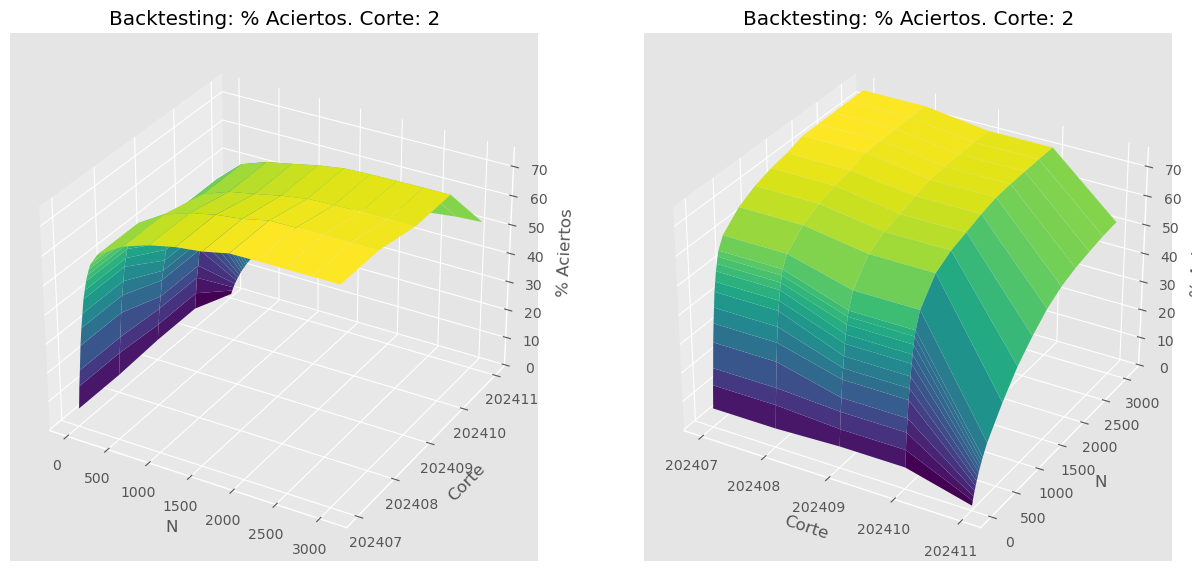

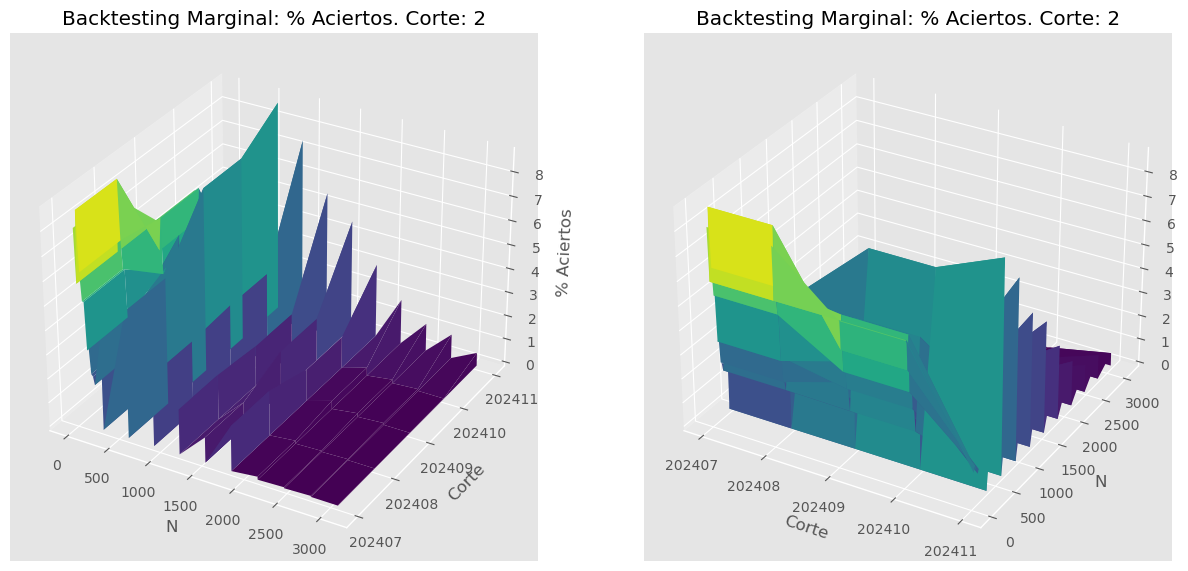

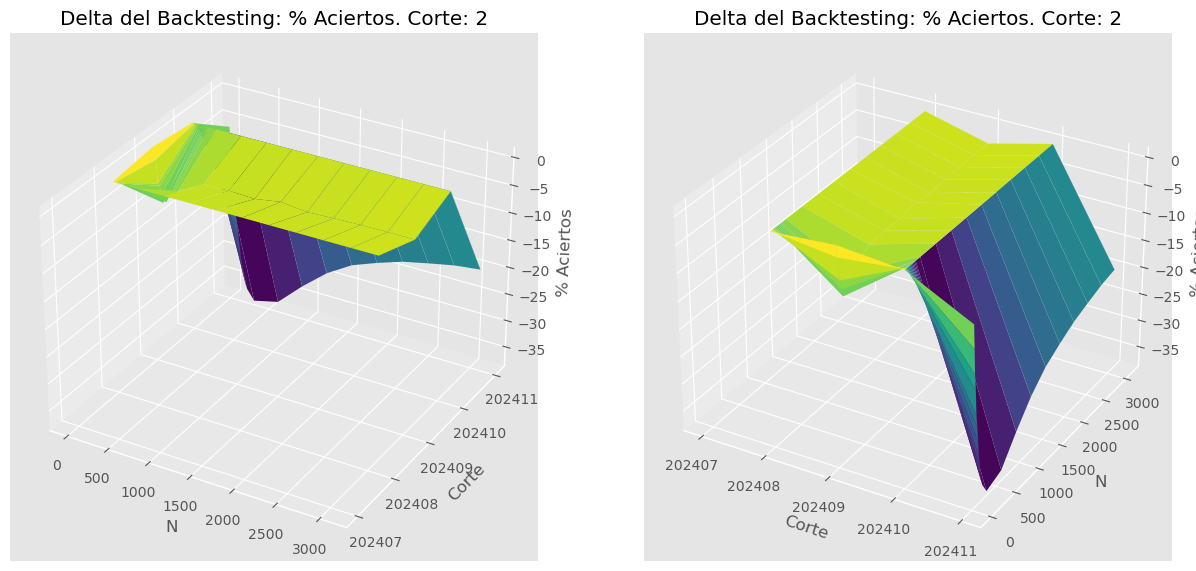

In [69]:
title = ['Backtesting','Backtesting Marginal','Delta del Backtesting']
for t,altura in enumerate([z2,z2.diff(),z2.diff(axis=1)]):
    # Crear subgráficos con 1 fila y 2 columnas
    fig, axs = plt.subplots(1, 2, figsize=(15, 15), subplot_kw={'projection': '3d'})
    
    # Primer gráfico: a la izquierda
    ax1 = axs[0]
    ax1.plot_surface(y1, x1, altura, cmap='viridis')
    ax1.set_title(f'{title[t]}: {z_name}. Corte: {rezago}')
    ax1.set_xlabel(f'{y_name}')
    ax1.set_ylabel(f'{x_name}')
    ax1.set_zlabel(f'{z_name}')
    ax1.set_yticks([int(i) for i in cortes_totales2])
    ax1.set_yticklabels([f'{i}' for i in cortes_totales2])
    
    # Segundo gráfico: a la derecha
    ax2 = axs[1]
    ax2.plot_surface(x1, y1, altura, cmap='viridis')
    ax2.set_title(f'{title[t]}: {z_name}. Corte: {rezago}')
    ax2.set_xlabel(f'{x_name}')
    ax2.set_ylabel(f'{y_name}')
    ax2.set_zlabel(f'{z_name}')
    ax2.set_xticks([int(i) for i in cortes_totales2])
    ax2.set_xticklabels([f'{i}' for i in cortes_totales2])
    # Mostrar el gráfico
    plt.show()